In [9]:
# --- 1. Import The Paleontologist's Tools (Libraries) ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:

# --- 2. Load the Fossil Records (Dataset) ---
file_path = '../data/dinosaur.csv'
df = pd.read_csv(file_path)

# --- 3. Initial Inspection of the Site ---
print("--- First 5 records ---")
print(df.head())

print("\n--- Dataset Info ---")
df.info()

--- First 5 records ---
   occurrence_no               name         diet            type  length_m  \
0         130294  Protarchaeopteryx   omnivorous  small theropod       2.0   
1         130295        Caudipteryx   omnivorous  small theropod       1.0   
2         139242        Gorgosaurus  carnivorous  large theropod       8.6   
3         139250        Gorgosaurus  carnivorous  large theropod       8.6   
4         139252        Gorgosaurus  carnivorous  large theropod       8.6   

   max_ma  min_ma    region         lng        lat       class  \
0   130.0  122.46  Liaoning  120.733330  41.799999  Saurischia   
1   130.0  122.46  Liaoning  120.733330  41.799999  Saurischia   
2    83.5   70.60   Alberta -111.528732  50.740726  Saurischia   
3    83.5   70.60   Alberta -111.549347  50.737015  Saurischia   
4    83.5   70.60   Alberta -111.564636  50.723866  Saurischia   

              family  
0  Archaeopterygidae  
1    Caudipterygidae  
2    Tyrannosauridae  
3    Tyrannosaurid

In [11]:
# --- 4. Cleaning the Fossil Data (Preprocessing) ---

# Step 4.1: Rename columns to remove potential spaces and use easier names
# Some CSV files have leading spaces in column names. This is a safe step.
df.columns = df.columns.str.strip()

# Step 4.2: Remove rows where 'diet' is unknown or 'omnivorous'
print(f"\nOriginal number of records: {len(df)}")
df.dropna(subset=['diet'], inplace=True)
df = df[df['diet'].isin(['carnivorous', 'herbivorous'])]
print(f"Records after cleaning diet: {len(df)}")


# Step 4.3: Define the features we WILL ACTUALLY USE from your CSV file
# Based on your sample data, these columns exist:
numerical_features = ['length_m', 'max_ma', 'min_ma'] 
print(f"\nUsing features: {numerical_features}")

# Step 4.4: Check for and fill missing values in these specific columns
print("\n--- Missing values in our features ---")
print(df[numerical_features].isnull().sum())

for col in numerical_features:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("\nMissing value check complete.")



Original number of records: 4951
Records after cleaning diet: 3384

Using features: ['length_m', 'max_ma', 'min_ma']

--- Missing values in our features ---
length_m    28
max_ma       0
min_ma       0
dtype: int64

Missing value check complete.


C:\Users\acer\AppData\Local\Temp\ipykernel_23412\2857454148.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_23412\2857454148.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

C:\Users\acer\AppData\Local\Temp\ipykernel_23412\2068838008.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diet', data=df, palette=['#e74c3c', '#2ecc71'])


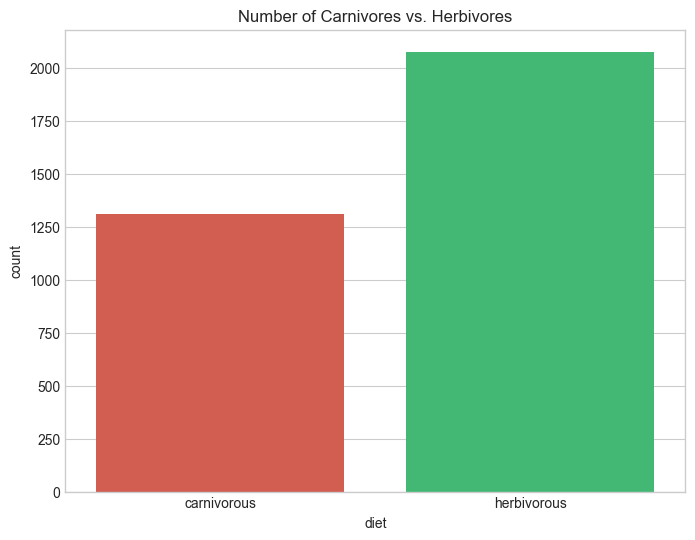

C:\Users\acer\AppData\Local\Temp\ipykernel_23412\2068838008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diet', y='length_m', data=df, palette=['#e74c3c', '#2ecc71'])


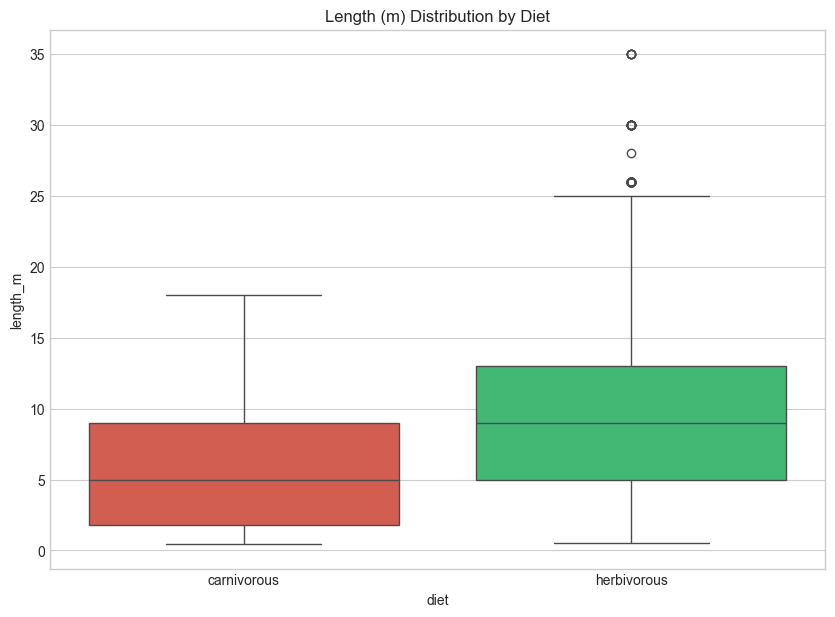

In [12]:
# --- 5. The Paleontologist's Detective Work (EDA) ---
plt.style.use('seaborn-v0_8-whitegrid')

# Q1: How many carnivores vs herbivores do we have?
plt.figure(figsize=(8, 6))
sns.countplot(x='diet', data=df, palette=['#e74c3c', '#2ecc71'])
plt.title('Number of Carnivores vs. Herbivores')
plt.show()

# Q2: How does length differ by diet?
plt.figure(figsize=(10, 7))
sns.boxplot(x='diet', y='length_m', data=df, palette=['#e74c3c', '#2ecc71'])
plt.title('Length (m) Distribution by Diet')
plt.show()


In [13]:
# --- 6. Preparing for Prediction (Feature Engineering) ---
df['diet_numeric'] = df['diet'].apply(lambda x: 1 if x == 'carnivorous' else 0)

# Select our CORRECTED features (X) and target (y)
features = ['length_m', 'max_ma', 'min_ma']
target = 'diet_numeric'

X = df[features]
y = df[target]

print("\n--- Features (X) for the model ---")
print(X.head())


--- Features (X) for the model ---
   length_m  max_ma  min_ma
2       8.6    83.5    70.6
3       8.6    83.5    70.6
4       8.6    83.5    70.6
5       8.6    83.5    70.6
6       8.6    83.5    70.6


In [14]:
# --- 7. Building the Dino-Identifier Model ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\nModel training complete!")



Model training complete!



Model Accuracy: 88.77%

Classification Report:
               precision    recall  f1-score   support

Herbivore (0)       0.91      0.91      0.91       415
Carnivore (1)       0.86      0.85      0.85       262

     accuracy                           0.89       677
    macro avg       0.88      0.88      0.88       677
 weighted avg       0.89      0.89      0.89       677


Confusion Matrix:


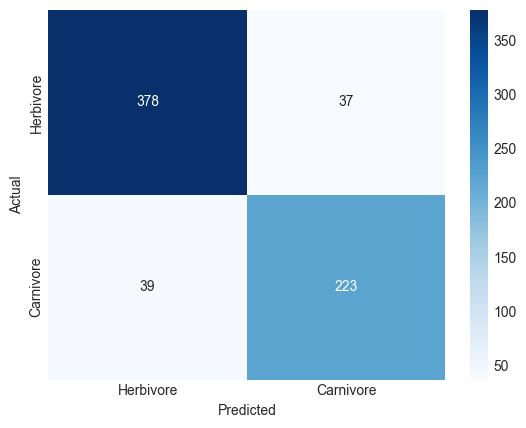

In [15]:
# --- 8. Evaluating the Model's Performance ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Herbivore (0)', 'Carnivore (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Herbivore', 'Carnivore'], yticklabels=['Herbivore', 'Carnivore'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
import joblib
import os

 
os.makedirs('../models', exist_ok=True) 
 
model_filename = '../models/dino_identifier_model.joblib'
joblib.dump(model, model_filename)

print(f"Model saved successfully to: {model_filename}")

Model saved successfully to: ../models/dino_identifier_model.joblib
